## <center> Катастрофа Титаника </center>

**План исследования**
 - Описание набора данных и признаков
 - Первичный анализ признаков
 - Первичный визуальный анализ признаков
 - Закономерности, "инсайты", особенности данных
 - Предобработка данных
 - Создание новых признаков и описание этого процесса
 - Кросс-валидация, подбор параметров
 - Построение кривых валидации и обучения 
 - Прогноз для тестовой или отложенной выборки
 - Оценка модели с описанием выбранной метрики
 - Выводы
 


In [1]:
import pandas as pd 
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.feature_selection import SelectKBest, mutual_info_classif, SelectFromModel, chi2
RANDOM_STATE = 42

###  Часть 1. Описание набора данных и признаков

Overview

The data has been split into two groups:

    training set (train.csv)
    test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.
Data Dictionary
Variable	Definition	Key
survival 	Survival 	0 = No, 1 = Yes
pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
sex 	Sex 	
Age 	Age in years 	
sibsp 	# of siblings / spouses aboard the Titanic 	
parch 	# of parents / children aboard the Titanic 	
ticket 	Ticket number 	
fare 	Passenger fare 	
cabin 	Cabin number 	
embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [ ]:
Обзор

Данные разделены на две группы:

обучающий набор данных (train.csv)
тестовый набор данных  (test.csv)

Обучающий набор следует использовать для построения моделей машинного обучения.
Для тренировочного набора мы предоставляем результат (также известный как «истина») для каждого пассажира.
Ваша модель будет основана на таких «признаках», как пол и класс пассажиров.
Вы также можете использовать конструирование признаков для создания новых признаков.

Тестовый набор следует использовать, чтобы увидеть, насколько хорошо ваша модель работает с невидимыми данными.
Что касается тестового набора, мы не предоставляем достоверную информацию для каждого пассажира.
Ваша работа - предсказать эти результаты. Для каждого пассажира в тестовом наборе используйте модель, которую вы обучили,
чтобы предсказать, пережили ли они гибель Титаника или нет.

В качестве примера того, как должен выглядеть файл отправки, мы также включаем gender_submission.csv - набор прогнозов,
предполагающих, что выживут все и только пассажиры женского пола.

Словарь данных Определение переменной Ключевое выживание Выживание 0 = Нет, 1 = Да pclass Класс билета 1 = 1-й, 2 = 2-й, 3 = 3-й пол Пол
Возраст Возраст в годах
sibsp # братьев и сестер / супругов на борту Титаника
parch Количество родителей / детей на борту Титаника
билет Номер билета
тариф Пассажирский тариф
каюта Номер каюты
Посадка в порт посадки C = Шербур, Q = Квинстаун, S = Саутгемптон Переменные Примечания

pclass: прокси для социально-экономического статуса (SES) 1-й = верхний 2-й = средний 3-й = нижний

age: возраст является дробным, если он меньше 1. Если возраст оценен, он имеет форму xx.5

sibsp: Набор данных определяет семейные отношения таким образом ... Сиблинг = брат, сестра, сводный брат, сводная сестра Супруга = муж, жена (любовницы и женихи игнорировались)

parch: Набор данных определяет семейные отношения таким образом ... Родитель = мать, отец Ребенок = дочь, сын, падчерица, пасынок Некоторые дети путешествовали только с няней, поэтому parch = 0 для них. 

###  Часть 2. Первичный анализ признаков

In [2]:
train_df = pd.read_csv("train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df = pd.read_csv("test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_df.shape

(891, 12)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_df.shape

(418, 11)

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Таким образом пропущенно около 20% данных в переменной Age и почти 80% в Cabin. И если с возрастом пассажиров можно провести обоснованное замещение пропущенных значений, в связи с небольшой их долей, то с каютами маловероятно что-то получится сделать, т.к. пропущенных значений существенно больше нежели заполненных

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
train_df.duplicated().sum()

0

In [11]:
test_df.duplicated().sum()

0

Посмотрим как много пассажиров выжило

In [12]:
train_df['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

 Выведем статистику выживаемости в зависимости от класса и пола.


In [13]:
print("survived by class and sex")
print(train_df.groupby(["Pclass", "Sex"])["Survived"].value_counts(normalize=True))

survived by class and sex
Pclass  Sex     Survived
1       female  1           0.968085
                0           0.031915
        male    0           0.631148
                1           0.368852
2       female  1           0.921053
                0           0.078947
        male    0           0.842593
                1           0.157407
3       female  0           0.500000
                1           0.500000
        male    0           0.864553
                1           0.135447
Name: Survived, dtype: float64


In [14]:
describe_fields = ["Age", "Fare", "Pclass", "SibSp", "Parch"]

print("===== train: males")
print(train_df[train_df["Sex"] == "male"][describe_fields].describe())

print("===== test: males")
print(test_df[test_df["Sex"] == "male"][describe_fields].describe())

print("===== train: females")
print(train_df[train_df["Sex"] == "female"][describe_fields].describe())

print("===== test: females")
print(test_df[test_df["Sex"] == "female"][describe_fields].describe())


===== train: males
              Age        Fare      Pclass       SibSp       Parch
count  453.000000  577.000000  577.000000  577.000000  577.000000
mean    30.726645   25.523893    2.389948    0.429809    0.235702
std     14.678201   43.138263    0.813580    1.061811    0.612294
min      0.420000    0.000000    1.000000    0.000000    0.000000
25%     21.000000    7.895800    2.000000    0.000000    0.000000
50%     29.000000   10.500000    3.000000    0.000000    0.000000
75%     39.000000   26.550000    3.000000    0.000000    0.000000
max     80.000000  512.329200    3.000000    8.000000    5.000000
===== test: males
              Age        Fare      Pclass       SibSp       Parch
count  205.000000  265.000000  266.000000  266.000000  266.000000
mean    30.272732   27.527877    2.334586    0.379699    0.274436
std     13.389528   41.079423    0.808497    0.843735    0.883745
min      0.330000    0.000000    1.000000    0.000000    0.000000
25%     22.000000    7.854200    2.0000

###  Часть 3. Первичный визуальный анализ признаков

In [15]:
all_df = pd.concat([train_df, test_df])
all_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Постройте попарные зависимости признаков Age, Fare, Pclass, Sex, SibSp, Parch, Embarked и Survived. (метод scatter_matrix Pandas или pairplot Seaborn).

D:\VES\WPy64-3850\python-3.8.5.amd64\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


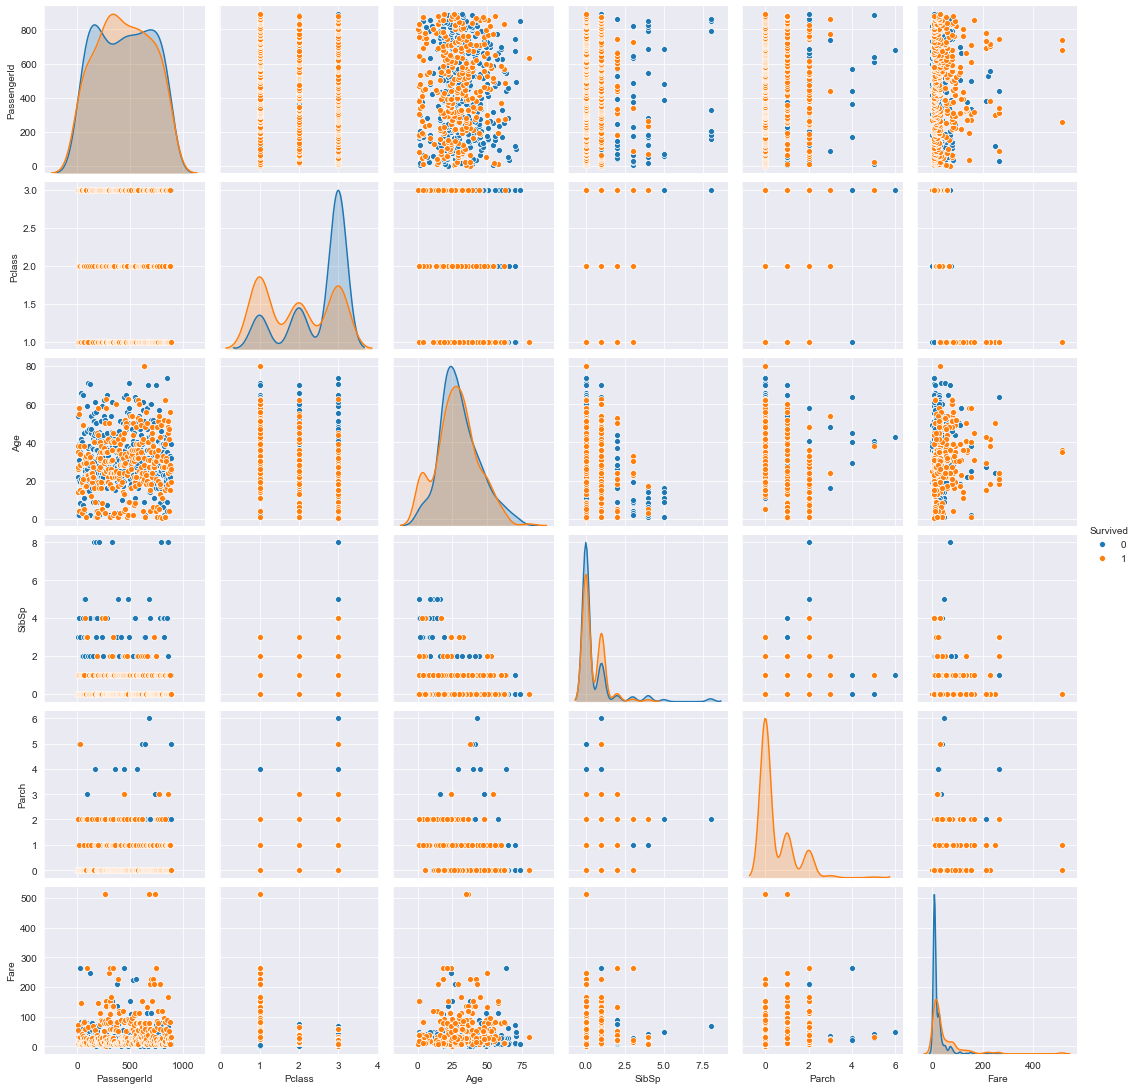

In [16]:
#sns.pairplot(train_df[['Survived', 'Age', 'Fare', 
                       #'Pclass', 'Sex', 'SibSp', 
                       #'Parch', 'Embarked']]);
sns.pairplot(train_df, hue = 'Survived');

Количество пассажиров мужского и женского пола

In [17]:
train_df['Sex'].value_counts().to_frame()

,Sex
male,577
female,314


Количество выживших пассажиров

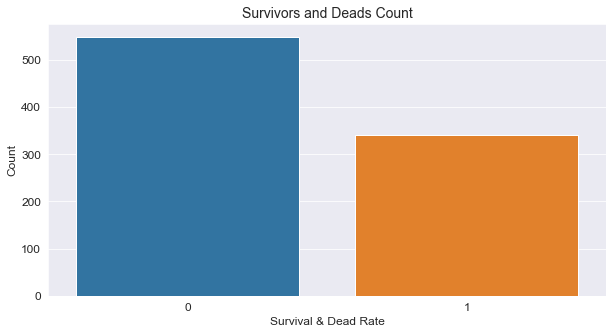

In [18]:
plt.figure(figsize=(10,5))
plt.title('Survivors and Deads Count', fontsize=14)
sns.countplot(x=train_df['Survived'])
plt.xlabel("Survival & Dead Rate", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

###  Часть 4. Закономерности, "инсайты", особенности данных. Создание новых признаков

Мы видим, что приблизительно 65 % пассажиров были мужчинами, в то время как остающиеся 35 % были женщинами.
Процент выживания для женщин был в четыре раза выже процента выживания для мужчин, и это делает Пол (Sex) одной из самых информативных особенностей.

In [19]:
train_df['Sex'].value_counts().to_frame()

,Sex
male,577
female,314


Каково соотношение погибших и выживших в зависимости от пола?

In [20]:
pd.crosstab(train_df['Sex'], train_df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [21]:
train_df.groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

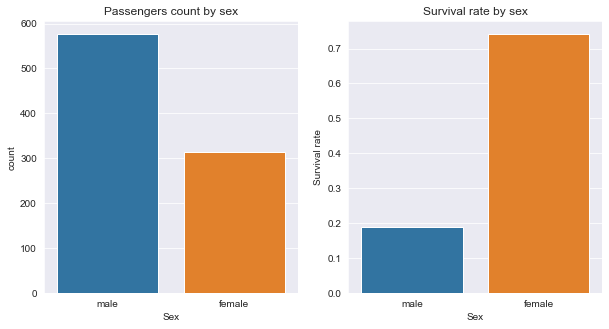

In [22]:
#sns.countplot(x="Sex", hue="Survived", data=train_df)
fig, axarr = plt.subplots(1, 2, figsize=(10,5))
a = sns.countplot(train_df['Sex'], ax=axarr[0]).set_title('Passengers count by sex')
axarr[1].set_title('Survival rate by sex')
b = sns.barplot(x='Sex', y='Survived', data=train_df, ci=None, ax=axarr[1]).set_ylabel('Survival rate')

## Pclass

Количество пассажиров в каждом классе

Было три класса на судне, и из графиков мы видим, что количество пассажиров в третьем классе был выше чем количество пассажиров в первом и втором  классах.
Однако, процент выживания в классе не пропорционален количеству пассажиров, больше чем 60 %  пассажиров первого класса и приблизительно половина пассажиров второго класса были спасены, тогда как 75 % пассажиров третьего класса не смогли пережить бедствие.
поэтому это - определенно важный признак

In [23]:
train_df['Pclass'].value_counts().to_frame()

,Pclass
3,491
1,216
2,184


Cоотношение погибших и выживших в зависимости от класса каюты

In [24]:
train_df.groupby("Pclass").Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

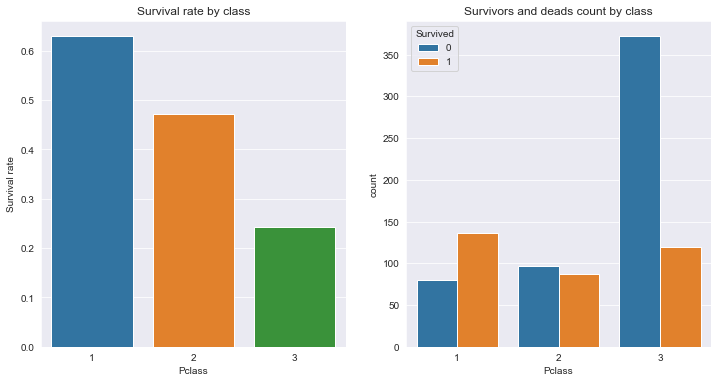

In [25]:
ig, axarr = plt.subplots(1,2,figsize=(12,6))
a = sns.barplot(x='Pclass', y='Survived', data=train_df, ci=None, ax=axarr[0]).set_ylabel('Survival rate')
axarr[0].set_title('Survival rate by class')
b = sns.countplot(x='Pclass', hue='Survived', data=train_df, ax=axarr[1]).set_title('Survivors and deads count by class')

Зависимость количества пассажиров мужского и женского пола в зависимости от класса каюты

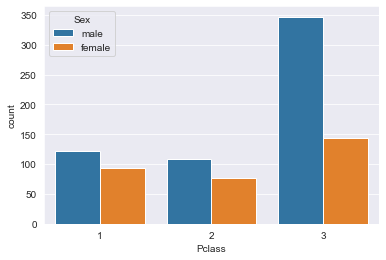

In [26]:
sns.countplot(x='Pclass', hue='Sex', data=train_df);

## Pclass & Sex

Рассмотрим процент выживания в зависимости от Sex и Pclass. Процент выживших женщин из первого и второго классов   97 % и 92 % соответственно, для женщин из третьего класса  процент выживших снижается до 50 %.
Несмотря на это, это - все еще больше чем 37%  выживших  мужчин из первого класса.

In [27]:
train_df.groupby(['Pclass', 'Sex']).Survived.mean().to_frame()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

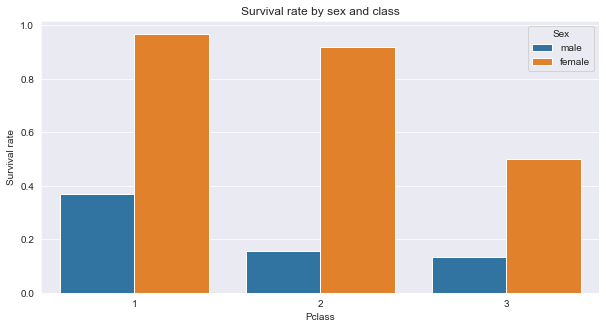

In [28]:
plt.figure(figsize = [10,5])
plt.title('Survival rate by sex and class')
g = sns.barplot(x='Pclass', y='Survived', hue='Sex', ci=None, data=train_df).set_ylabel('Survival rate')

## Age

Несмотря на то, что столбец 'Age' содержит много пропущенных значений, мы видим, что в тренировочных данных средний возраст пассажиров был менее 30 лет.
Сравним гистограмма общего распределения пассажиров по возрасту с распределением для выживших и погибших.

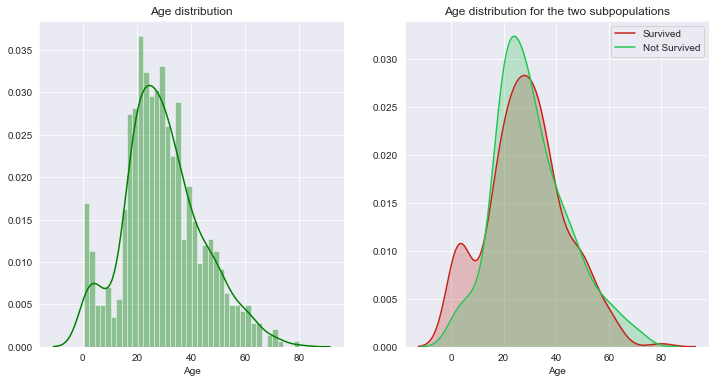

In [29]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
axarr[0].set_title('Age distribution')
f = sns.distplot(train_df['Age'], color='g', bins=40, ax=axarr[0])
axarr[1].set_title('Age distribution for the two subpopulations')
g = sns.kdeplot(train_df['Age'].loc[train_df['Survived'] == 1], color='#C52219',
                shade= True, ax=axarr[1], label='Survived').set_xlabel('Age')
g = sns.kdeplot(train_df['Age'].loc[train_df['Survived'] == 0], color='#23C552',
                shade=True, ax=axarr[1], label='Not Survived')

Также можно проверить гипотезу, что выживают более молодые, т.к. они быстрее двигаются, лучше плавают и т.д.

## Age & Sex

На первый взгляд связь между Age и Survived, кажется не очень ясной, мы замечаем, что есть пик, соответствующий молодым пассажирам для тех, кто выжил, но кроме этого остальная информация не очень информативна. ¶
Мы можем оценить эту особенность лучше, если  рассмотрим признак Sex: теперь более ясно, что возраст большей части оставшихся в живых пассажиров мужского пола был менее 12 лет, в то время как у группы женского пола нет никаких особых свойств.

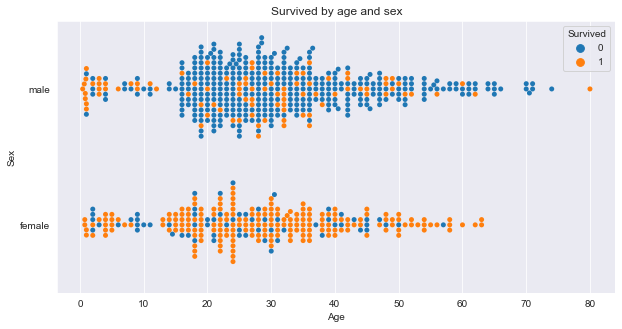

In [30]:
plt.figure(figsize=(10,5))
g = sns.swarmplot(y='Sex', x='Age', hue='Survived',  data=train_df).set_title('Survived by age and sex')

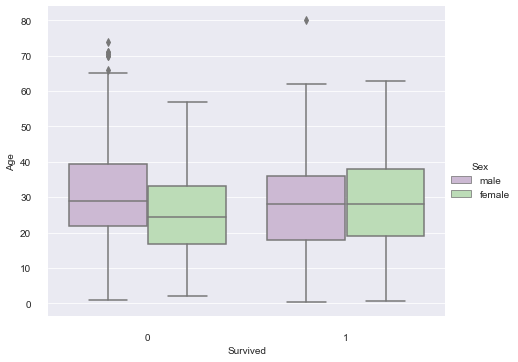

In [31]:
g = sns.catplot("Survived", "Age", "Sex", train_df, kind="box",
                   palette="PRGn", aspect=1.25)
g.despine(offset=10, trim=True)

## Age, Pclass & Sex

Интересна связь между Age, Pclass и Survived.
Мы видим, что влияние Pclass - важное, поскольку нет  очевидной горизонтальной закономерности.
Кроме того, отметим, что среди пассажиров первого класса было мало детей.

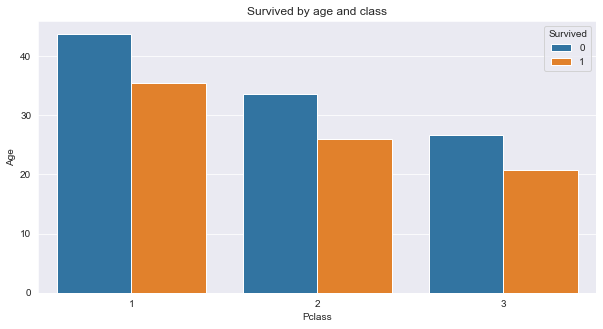

In [32]:
plt.figure(figsize=(10,5))
h = sns.barplot(x='Pclass', y='Age', hue='Survived', ci=None, data=train_df).set_title('Survived by age and class')

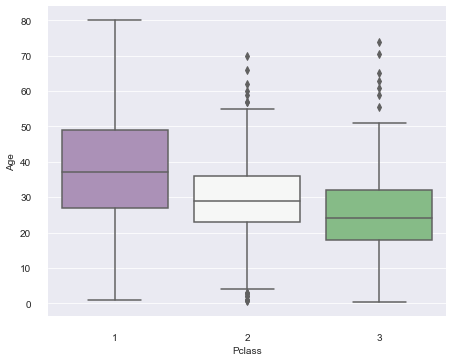

In [33]:
g = sns.catplot(x = "Pclass", y = "Age", data = train_df, kind="box",
                   palette="PRGn", aspect=1.25)
g.despine(offset=10, trim=True)

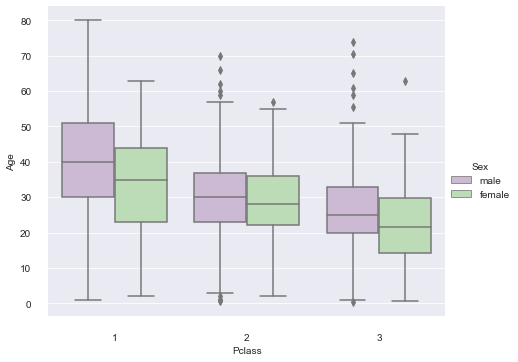

In [34]:
g = sns.catplot("Pclass", "Age","Sex", train_df, kind="box",
                   palette="PRGn", aspect=1.25)
g.despine(offset=10, trim=True)

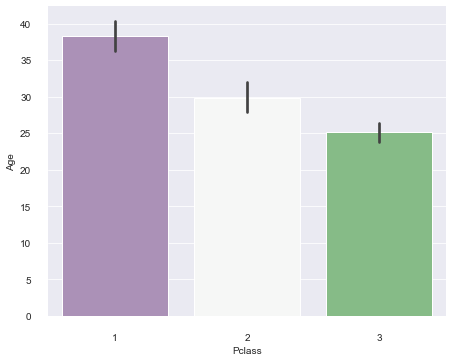

In [35]:
g = sns.catplot(x = "Pclass", y = "Age", data = train_df, kind="bar",
                   palette="PRGn", aspect=1.25)
g.despine(offset=10, trim=True)

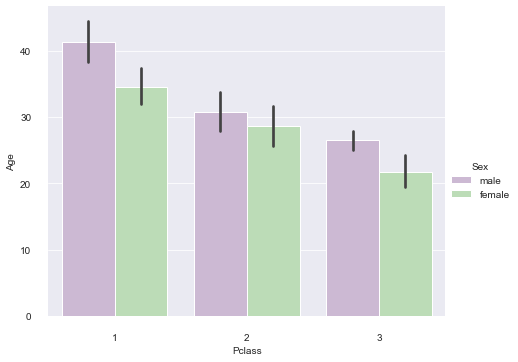

In [36]:
g = sns.catplot("Pclass", "Age","Sex", train_df, kind="bar",
                   palette="PRGn", aspect=1.25)
g.despine(offset=10, trim=True)

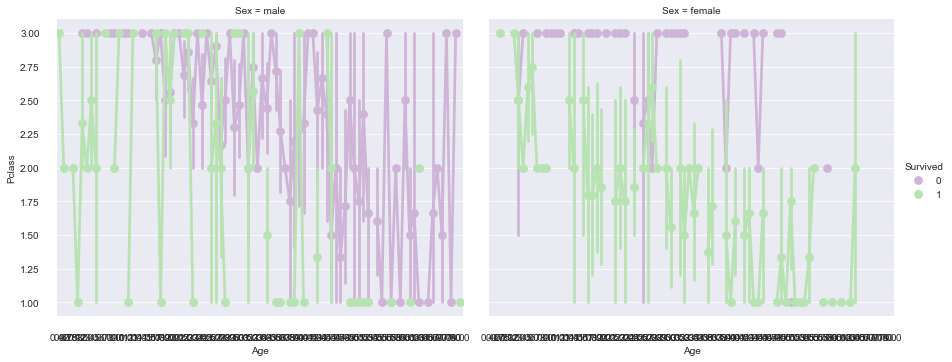

In [37]:
g = sns.catplot(x = "Age", y = "Pclass", hue="Survived", col = "Sex", data = train_df, kind="point",
                   palette="PRGn", aspect=1.25)
g.despine(offset=10, trim=True)

Также можно проверить гипотезу, что выживают более молодые, т.к. они быстрее двигаются, лучше плавают и т.д.

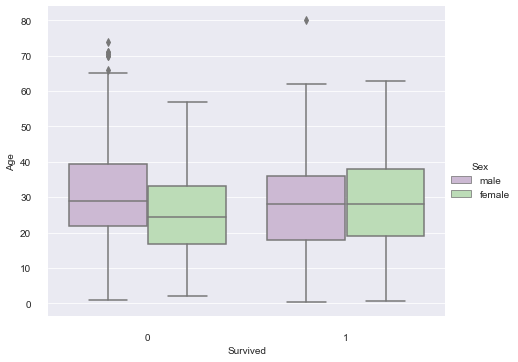

In [38]:
g = sns.catplot("Survived", "Age", "Sex", train_df, kind="box",
                   palette="PRGn", aspect=1.25)
g.despine(offset=10, trim=True)

Как видно, явная зависимость здесь не просматривается.

## Fare

Из описания мы видим, что распределение Fare имеет позитивный скос с 75% данных до 31 и максимум 51.2.
Только, чтобы понять лучше эту особенность, самая простая идея здесь могла создавать диапазоны Fare, используя квартили.
На первый взгляд, мы замечаем что чем выше тариф, тем выше возможность выживания.

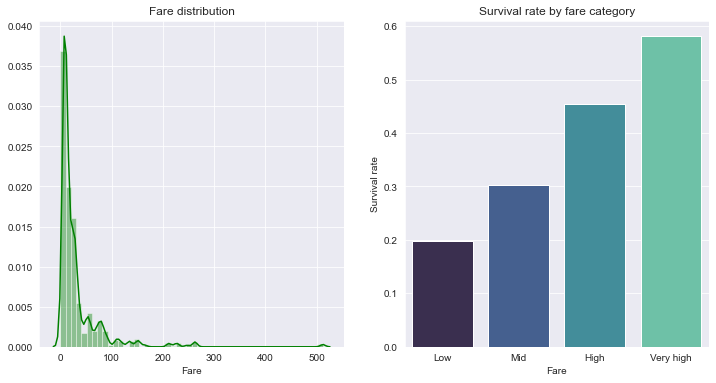

In [39]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
f = sns.distplot(train_df.Fare, color='g', ax=axarr[0]).set_title('Fare distribution')
fare_ranges = pd.qcut(train_df.Fare, 4, labels = ['Low', 'Mid', 'High', 'Very high'])
axarr[1].set_title('Survival rate by fare category')
g = sns.barplot(x=fare_ranges, y=train_df.Survived, palette='mako', ci=None, ax=axarr[1]).set_ylabel('Survival rate')

## Fare & Sex

Смотря на более подробный график ниже, мы также видим например, что все мужчины с Fare между 200 и 300 умерли.
поэтому мы можем, оставить признак  Fare,  чтобы предотвратить потерю  большого количества информации; на более глубоких уровнях дерева могли бы открыться более дискриминантные отношения, и это могло стать хорошим датчиком группы.

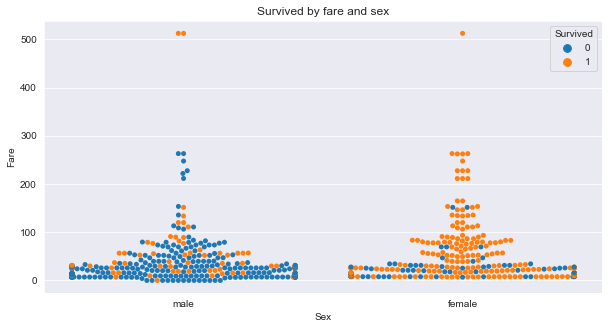

In [40]:
plt.figure(figsize=(10,5))
a = sns.swarmplot(x='Sex', y='Fare', hue='Survived', data=train_df).set_title('Survived by fare and sex')

Минимальная стоимость для Fare - ноль, и это является немного странным.
Давайте посмотрим на список пассажиров.

In [41]:
train_df.loc[train_df.Fare==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [42]:
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [43]:
train_df[train_df["Fare"] < 6].groupby("Fare")["Fare", "Age", "Pclass"].head()

<ipython-input-43-ef3ebe1e3ce2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  train_df[train_df["Fare"] < 6].groupby("Fare")["Fare", "Age", "Pclass"].head()


,Fare,Age,Pclass
179,0.0000,36.0,3
263,0.0000,40.0,1
271,0.0000,25.0,3
277,0.0000,NaN,2
302,0.0000,19.0,3
378,4.0125,20.0,3
872,5.0000,33.0,1


Первое объяснение, которое приходит в голову — это дети, но, если посмотреть на другие признаки этих пассажиров, то данное предположение оказывается ложным.

В списке 15 пассажиров с нулевой стоимостью билетов. Так как несколько из них относятся к первому и второму классу мы должны удалить нулевые значения

## Embarked

Признак Embarked показывает в каком порту пассажир сел на борт. Имеется три возможных значения Southampton, Cherbourg and Queenstown.
В тренировочном наборе данных более чем 70% пассажиров поднялись на борт в Саутгемптоне, немного менее из Шербура и остальные из Квинстона.
Подсчитав выживших в зависимости от порта посадки видим, что среди пассажиров поднявшихся на борт в Шербуре больше выживших, чем погибших.
Большинство пассажиров, поднявшихся на борт в Саутгемптоне не выжило.


In [44]:
train_df['Embarked'].value_counts().to_frame()

,Embarked
S,644
C,168
Q,77


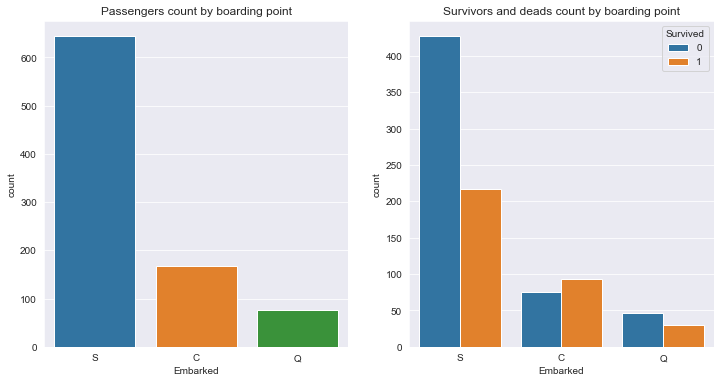

In [45]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
sns.countplot(train_df['Embarked'],  ax=axarr[0]).set_title('Passengers count by boarding point')
p = sns.countplot(x = 'Embarked', hue = 'Survived', data = train_df, 
                  ax=axarr[1]).set_title('Survivors and deads count by boarding point')

Так как порт посадки пассажиров не может изменить шансы на выживание, предположим, что различие в количестве выживших объясняется большим количеством пассажиров первого и второго классов, которые поднялись на борт в Шербуре, чем в Саутгемптоне и Квинстоне.
Проверим это предположение

In [46]:
train_df.groupby(['Embarked', 'Pclass']).Survived.sum().to_frame()

Survived
Embarked Pclass          
C        1             59
         2              9
         3             25
Q        1              1
         2              2
         3             27
S        1             74
         2             76
         3             67

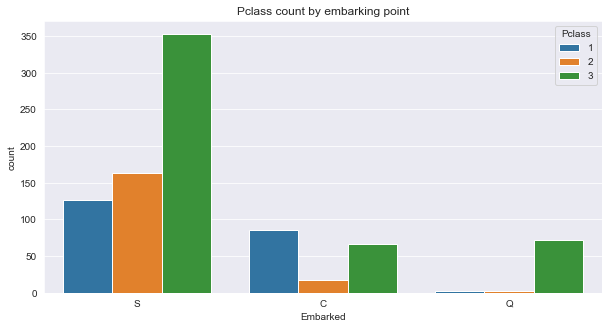

In [47]:
plt.figure(figsize=(10,5))
g = sns.countplot(data=train_df, x='Embarked', hue='Pclass').set_title('Pclass count by embarking point')

Предположение верно, и объясняет, почему процент выживших настолько высок для пассажиров, поднявшихся на борт  в Шербуре

Кроме того, большинство пассажиров 3-го класса, поднявшихся на борт в Саутгемптоне умерли.
И есть только 1 пассажир из 1-ого класса и 2 пассажира из 2-ого класса, поднявшихся на борт в Квинстоне.

## Name

Столбец Name содержит полезную информацию, например, можно идентифицировать семьи по фамилиям.
В данной работе мы выделим только титулы пассажиров

In [48]:
train_df['Title'] = train_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test_df['Title'] = test_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [49]:
train_df['Title'].value_counts().to_frame()

,Title
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2
the Countess,1


In [50]:
test_df['Title'].value_counts().to_frame()

,Title
Mr,240
Miss,78
Mrs,72
Master,21
Rev,2
Col,2
Dona,1
Dr,1
Ms,1


In [51]:
train_df.groupby("Title").describe()["Age"]

,count,mean,std,min,25%,50%,75%,max
Title,,,,,,,,
Capt,1.0,70.000000,NaN,70.00,70.000,70.0,70.00,70.0
Col,2.0,58.000000,2.828427,56.00,57.000,58.0,59.00,60.0
Don,1.0,40.000000,NaN,40.00,40.000,40.0,40.00,40.0
Dr,6.0,42.000000,12.016655,23.00,35.000,46.5,49.75,54.0
Jonkheer,1.0,38.000000,NaN,38.00,38.000,38.0,38.00,38.0
Lady,1.0,48.000000,NaN,48.00,48.000,48.0,48.00,48.0
Major,2.0,48.500000,4.949747,45.00,46.750,48.5,50.25,52.0
Master,36.0,4.574167,3.619872,0.42,1.000,3.5,8.00,12.0
Miss,146.0,21.773973,12.990292,0.75,14.125,21.0,30.00,63.0


In [52]:
train_df['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)
test_df['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)
train_df['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)
test_df['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)

In [53]:
train_df.groupby('Title').Survived.mean()

Title
Dr        0.428571
Master    0.575000
Miss      0.707447
Mr        0.160000
Mrs       0.792000
Rev       0.000000
Name: Survived, dtype: float64

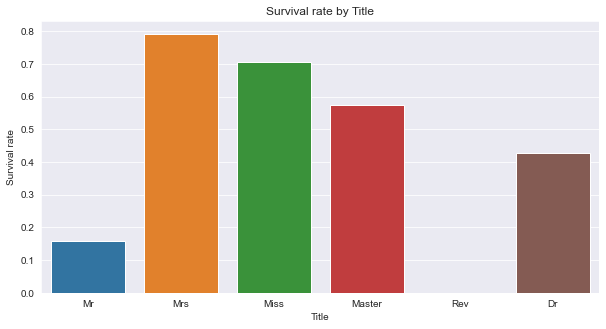

In [54]:
plt.figure(figsize=(10,5))
plt.title('Survival rate by Title')
g = sns.barplot(x='Title', y='Survived', ci=None, data=train_df).set_ylabel('Survival rate')

In [55]:
def change_titles(data, old_title, new_title):
    for title in old_title:
        data["Title"].where(data["Title"] == title, new_title, inplace = True)

In [56]:
#train_df["Title"] = change_titles(train_df, ["Capt", "Col", "Don", "Dr", 
#                                            "Jonkheer", "Lady", "Major", 
#                                            "Rev", "Sir", "Countess"],"Aristocratic")

#train_df["Title"] = change_titles(train_df, ["Ms"], "Mrs")

#train_df["Title"] = change_titles(train_df, ["Mlle", "Mme"], "Miss")

## Cabin

Признак Cabin содержит много пропущенных значений

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


<AxesSubplot:xlabel='Cabin', ylabel='count'>

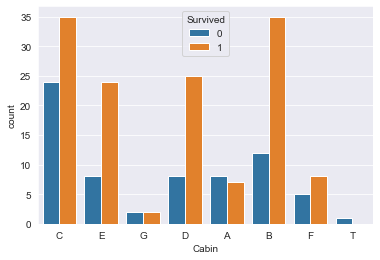

In [57]:
print(train_df['Cabin'].unique())
# Extrac to carbin models
train_df['Cabin'] = train_df['Cabin'].str.get(0)
sns.countplot(data=train_df, x='Cabin', hue='Survived')

In [58]:
train_df['Cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

## isCabin

Из признака Cabin, т.е. номера каюты занимаемой пассажиром, можно было бы извлечь номер палубы (это буква в номере) и на каком борту была каюта (если последняя цифра номера нечётная, то это левый борт, и, соответственно, наоборот), но, т.к. номера кают в данных есть всего лишь у 20% пассажиров, то я не думаю, что это существенно повлияет на точность модели. Гораздо интереснее, по моему мнению, будет информация о наличии этого номера. Номера кают первого класса стали известны из списка, который был найден на теле стюарта Herbert Cave, больше никакой официальной информации не сохранилось, соответственно, можно сделать вывод, что, если известен номер каюты пассажира второго или третьего класса, то он выжил. Поэтому, как и с родственниками, посмотрим на выживаемость в зависимости от наличия номера каюты в целом по всем пассажирам и в разрезе по классам и полу.

In [59]:
train_df["isCabin"] = 1
train_df["isCabin"].where(train_df["Cabin"].isnull(), 0, inplace = True)
test_df["isCabin"] = 1
test_df["isCabin"].where(train_df["Cabin"].isnull(), 0, inplace = True)

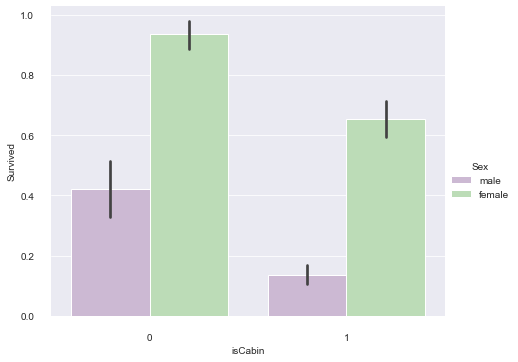

In [60]:
g = sns.catplot(x = "isCabin", y = "Survived", hue="Sex", data = train_df, kind="bar",
                   palette="PRGn", aspect=1.25)
g.despine(offset=10, trim=True)

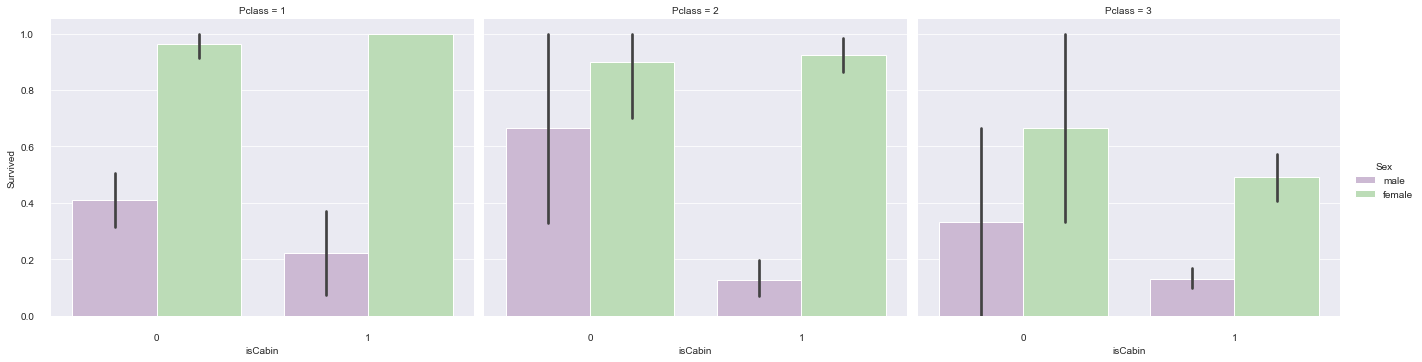

In [61]:
g = sns.catplot(x = "isCabin", y = "Survived", hue="Sex", col = "Pclass", data = train_df, kind="bar",
                   palette="PRGn", aspect=1.25)
g.despine(offset=10, trim=True)

Очевидно, что предположение подтвердилось, в особенности для пассажиров мужского пола.

## Ticket

Признак Ticket можно использовать для нахождения семейных групп 

In [62]:
# **Extract the first two letters**
train_df['Ticket_lett'] = train_df.Ticket.apply(lambda x: x[:2])
test_df['Ticket_lett'] = test_df.Ticket.apply(lambda x: x[:2])

In [63]:
# **Calculate ticket length**
train_df['Ticket_len'] = train_df.Ticket.apply(lambda x: len(x))
test_df['Ticket_len'] = test_df.Ticket.apply(lambda x: len(x))

## SibSp

SibSp - количество родственников или супругов на борту Титаника.
Более 90% пассажиров путешествовало самостоятельно или одним родственником.
Никто из имевших 5 - 8 родственников не выжил 

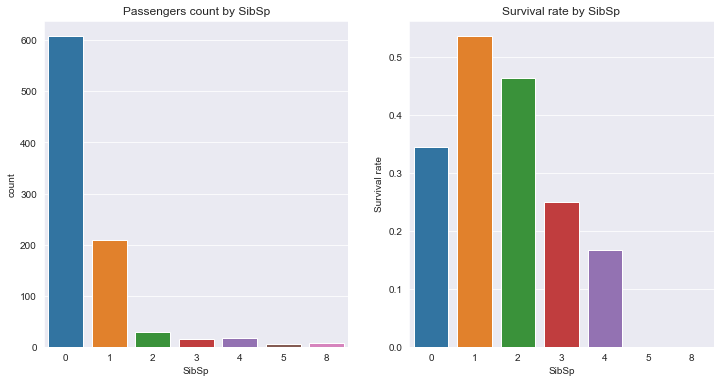

In [64]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
a = sns.countplot(train_df['SibSp'],  ax=axarr[0]).set_title('Passengers count by SibSp')
axarr[1].set_title('Survival rate by SibSp')
b = sns.barplot(x='SibSp', y='Survived', data=train_df,  ci=None, ax=axarr[1]).set_ylabel('Survival rate')

<AxesSubplot:title={'center':'Survival rate by SibSp'}, xlabel='SibSp', ylabel='count'>

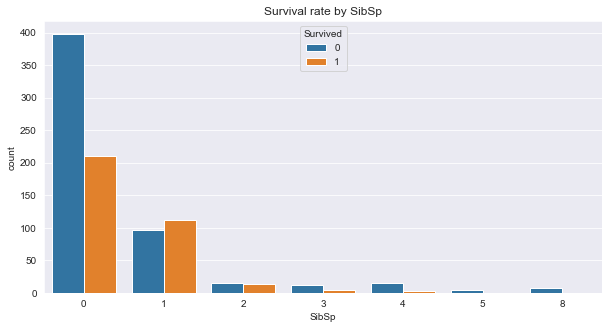

In [65]:
plt.figure(figsize = [10,5])
plt.title('Survival rate by SibSp')
sns.countplot(x='SibSp', hue='Survived',  data=train_df)

## Parch

Признак Parch количество родителей или детей для каждого пассажира.
Подтверждается гипотеза возрастания вероятности выживания с уменьшением размера семьи

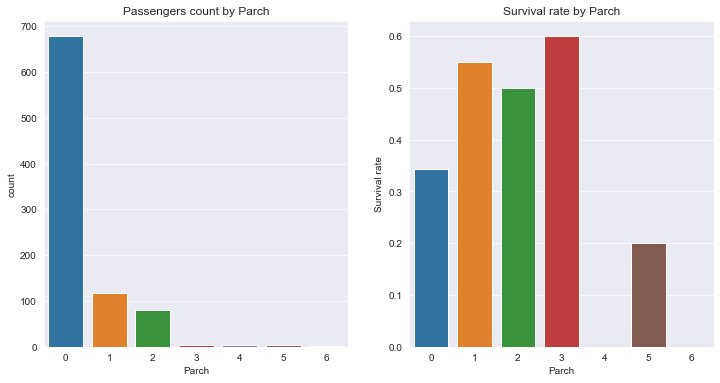

In [66]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
a = sns.countplot(train_df['Parch'],  ax=axarr[0]).set_title('Passengers count by Parch')
axarr[1].set_title('Survival rate by Parch')
b = sns.barplot(x='Parch', y='Survived', data=train_df,  ci=None, ax=axarr[1]).set_ylabel('Survival rate')

<AxesSubplot:title={'center':'Survival rate by Parch'}, xlabel='Parch', ylabel='count'>

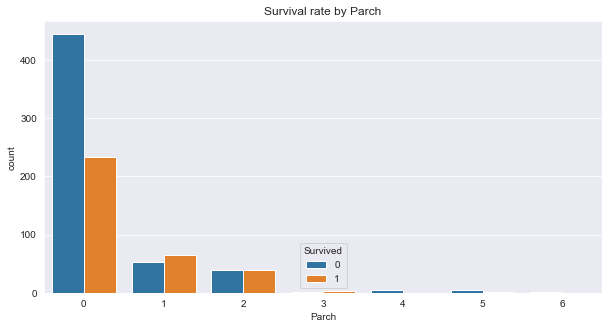

In [67]:
plt.figure(figsize = [10,5])
plt.title('Survival rate by Parch')
sns.countplot(x='Parch', hue='Survived', data=train_df)

## Family Size

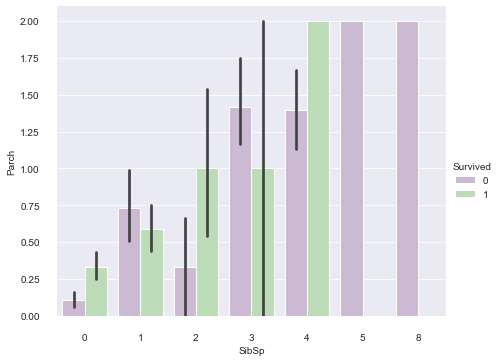

In [68]:
g = sns.catplot(x = "SibSp", y = "Parch", hue="Survived", data = train_df, kind="bar",
                   palette="PRGn", aspect=1.25)
g.despine(offset=10, trim=True)

Скомбинируем два слабых признака для получения более сильного.
В случае SibSp и Parch объединим две переменнные для получения признака, определяющего размер семьи, который является суммой SibSp и Parch и 1(сам пассажир)

In [69]:
train_df['Fam_size'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Fam_size'] = test_df['SibSp'] + test_df['Parch'] + 1

In [70]:
train_df["Fam_size"].describe()

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: Fam_size, dtype: float64

In [71]:
pd.crosstab(train_df['Fam_size'], train_df['Survived'])

Survived,0,1
Fam_size,,
1,374,163
2,72,89
3,43,59
4,8,21
5,12,3
6,19,3
7,8,4
8,6,0
11,7,0


In [72]:
surv =pd.crosstab(train_df['Fam_size'], train_df['Survived'])
surv_rate_family = surv[1]/(surv[1]+surv[0])
surv_rate_family

Fam_size
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
dtype: float64

Из графика видно, что одинокие люди имеют меньшую вероятность выживания, чем семьи с количеством членов, не превышающих 4, вероятность выживания резко падает при дальнейшем увеличении количества членов семьи и равна нулю при очень больших размерах семьи.

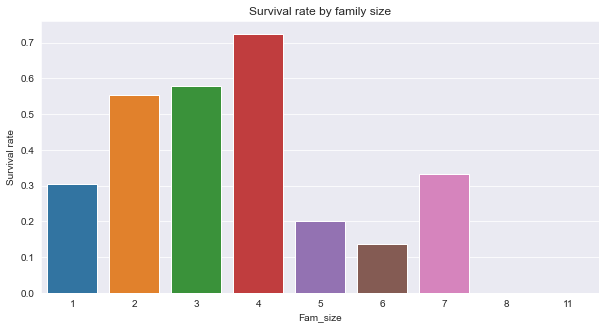

In [73]:
plt.figure(figsize=(10,5))
plt.title('Survival rate by family size')
g = sns.barplot(x='Fam_size', y='Survived',  ci=None, data=train_df).set_ylabel('Survival rate')

<AxesSubplot:title={'center':'Survival rate by family size'}, xlabel='Fam_size', ylabel='count'>

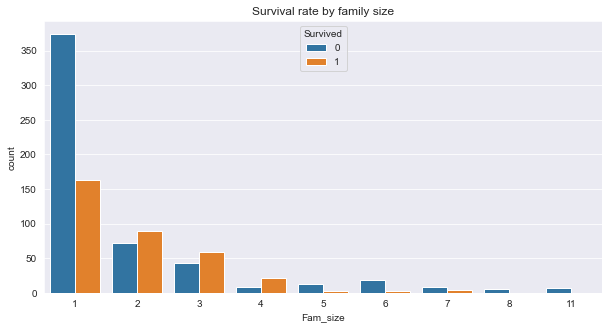

In [74]:
plt.figure(figsize=(10,5))
plt.title('Survival rate by family size')
sns.countplot(x='Fam_size', hue='Survived', data=train_df)

И также в разрезе по полам пассажиров

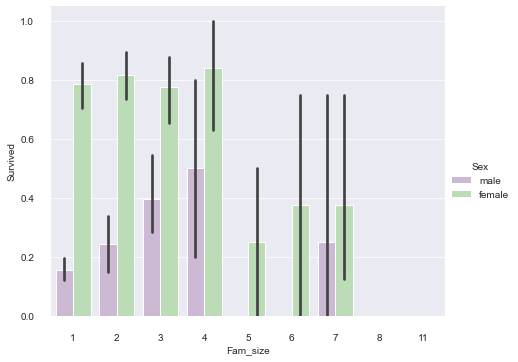

In [75]:
g = sns.catplot(x = "Fam_size", y = "Survived", hue="Sex", data = train_df, kind="bar",
                   palette="PRGn", aspect=1.25)
g.despine(offset=10, trim=True)

## Family Type

Создадим четыре группы для размера семьи

In [76]:
# Creation of four groups
train_df['Fam_type'] = pd.cut(train_df.Fam_size, [0,1,4,7,11], labels=['Solo', 'Small', 'Big', 'Very big'])
test_df['Fam_type'] = pd.cut(test_df.Fam_size, [0,1,4,7,11], labels=['Solo', 'Small', 'Big', 'Very big'])

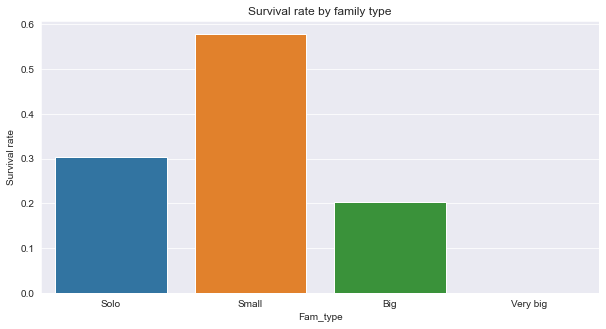

In [77]:
plt.figure(figsize=(10,5))
plt.title('Survival rate by family type')
g = sns.barplot(x=train_df.Fam_type, y=train_df.Survived,  ci=None).set_ylabel('Survival rate')

<AxesSubplot:title={'center':'Survival rate by family type'}, xlabel='Fam_type', ylabel='count'>

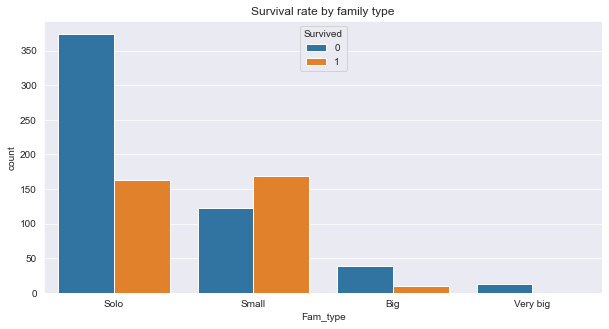

In [78]:
plt.figure(figsize=(10,5))
plt.title('Survival rate by family type')
sns.countplot(x='Fam_type', hue='Survived', data=train_df)

## isFamily

In [79]:
train_df["isFamily"] = 0
train_df["isFamily"].where(train_df["Fam_size"] > 1 , 1, inplace = True) 
test_df["isFamily"] = 0
test_df["isFamily"].where(train_df["Fam_size"] > 1 , 1, inplace = True) 


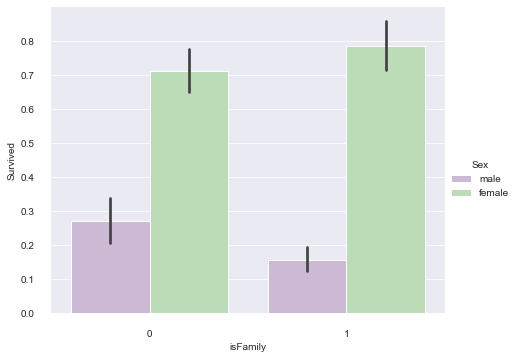

In [80]:
g = sns.catplot(x = "isFamily", y = "Survived", hue="Sex", data = train_df, kind="bar",
                   palette="PRGn", aspect=1.25)
g.despine(offset=10, trim=True)

На первый взгляд, похоже, что присутствие родственников повышает вероятность выжить, но, если посмотреть на связь в разрезе по классам и полу, то картина меняется.

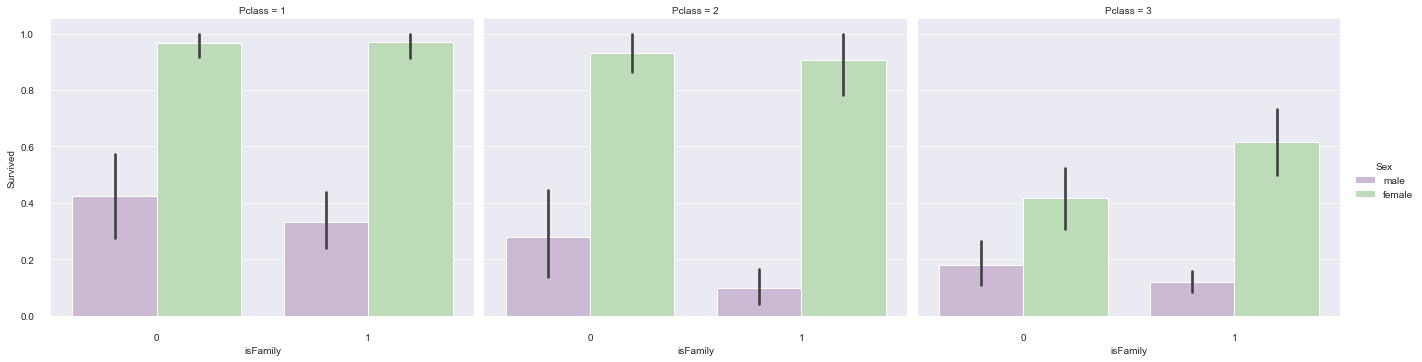

In [81]:
g = sns.catplot(x = "isFamily", y = "Survived", hue="Sex", col = "Pclass", data = train_df, kind="bar",
                   palette="PRGn", aspect=1.25)
g.despine(offset=10, trim=True)

Для мужчины во втором классе родственники повышают выживаемость, но для женщины в третьем классе — ситуация обратная.

<AxesSubplot:>

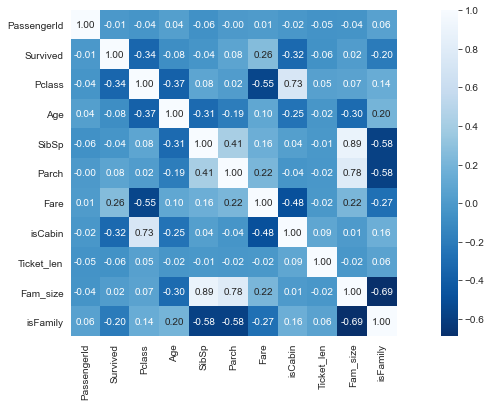

In [82]:
plt.figure(figsize = (16, 6))
sns.heatmap(train_df.corr(), 
            annot = True,
            fmt = '.2f',
            square = True ,
            cmap = "Blues_r") #, 
            #mask = np.triu(train_df.corr()))
       

###  Часть 5. Предобработка данных  и отбор признаков

Ненадолго вернёмся к пропущенным значениям. Из графика Распределение пассажиров по пункту отправления очевидно, что большинство пассажиров отправлялось из Southampton, соответственно можно спокойно заменить 2 NA этим значением


In [83]:
#train_df.Embarked[train_df.Embarked.isnull()] = "S"
#train_df["Embarked"].fillna("S", inplace = True)

Вернёмся к пропущенным значениям в данных. Один из обычных способов борьбы с ними — это замена на среднее от доступных значении того же признака. Например, 177 пропущенных из признака Age можно заменить на 29.7


Такой способ я уже успешно применял раннее с признаком Embarked, но там было всего две замены, а здесь же — 177, что составляет более 20% от всех имеющихся данных по этому признаку. Поэтому, стоит найти более точный способ замены.

Один из возможных вариантов — это взять среднее, но в зависимости от класса каюты, т.к., если посмотреть на график, расположенный ниже, то такая взаимосвязь возможна. И, если подумать, то такое предположение интуитивно понятно: чем старше человек — тем его вероятное благосостояние выше и, соответственно, выше и тот уровень комфорта, который он может себе позволить. Таким образом, можно заменить пропущенное значение для пассажира, например из третьего класса, средним возрастом для этого класса, что уже будет большим прогрессом, по сравнению с просто средним по всем пассажирам.



In [84]:
 y = train_df['Survived']
features = ['Pclass', 'Fare', 'Title', 'Embarked', 'Fam_type', 'Ticket_len', 'Ticket_lett', 'isFamily', 'isCabin']
X = train_df[features]
X.head()                           

,Pclass,Fare,Title,Embarked,Fam_type,Ticket_len,Ticket_lett,isFamily,isCabin
0,3,7.2500,Mr,S,Small,9,A/,0,1
1,1,71.2833,Mrs,C,Small,8,PC,0,0
2,3,7.9250,Miss,S,Solo,16,ST,1,1
3,1,53.1000,Mrs,S,Small,6,11,0,0
4,3,8.0500,Mr,S,Solo,6,37,1,1


In [85]:
numerical_cols = ['Fare']
categorical_cols = ['Pclass', 'Title', 'Embarked', 'Fam_type', 'Ticket_len', 'Ticket_lett']

In [86]:
Xc = X.copy()
yc = y.copy()

numerical_transformer = SimpleImputer(strategy='median')
imputer = SimpleImputer(strategy = 'most_frequent')
onehot = OneHotEncoder(handle_unknown='ignore', sparse = False)

Xc[numerical_cols] = numerical_transformer.fit_transform(Xc[numerical_cols],yc)
Xc[categorical_cols] = imputer.fit_transform(Xc[categorical_cols],yc)

# Label encoding for categoricals
for colname in Xc.select_dtypes("object"):
    Xc[colname], _ = Xc[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = Xc.dtypes == int
Xc.shape

(891, 9)

<AxesSubplot:>

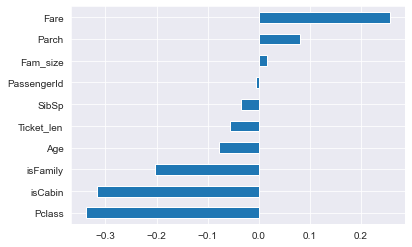

In [87]:
correlations = train_df.corr(method='pearson')['Survived'].drop('Survived')
correlations.sort_values().plot(kind='barh')

In [88]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores



def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [89]:
mi_scores = make_mi_scores(Xc, y, discrete_features)
mi_scores[::1]  # show a few features with their MI scores

Title          0.221791
Fare           0.133209
Ticket_lett    0.105702
isCabin        0.082351
Fam_type       0.078123
Pclass         0.051941
Embarked       0.043256
isFamily       0.020735
Ticket_len     0.000000
Name: MI Scores, dtype: float64

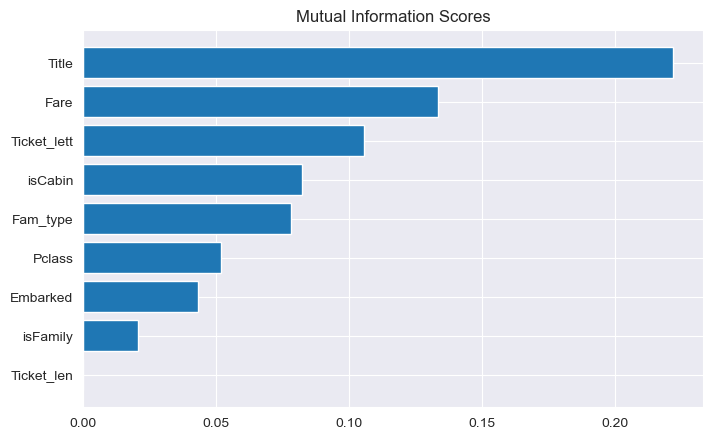

In [90]:
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [91]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

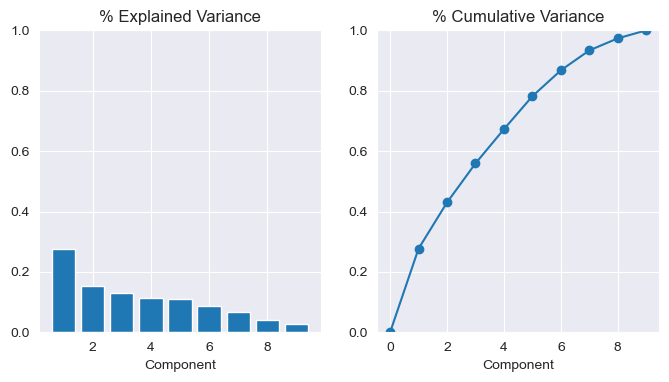

In [92]:
# Standardize
Xc_scaled = (Xc - Xc.mean(axis=0)) / Xc.std(axis=0)

from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
Xc_pca = pca.fit_transform(Xc_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(Xc_pca.shape[1])]
Xc_pca = pd.DataFrame(Xc_pca, columns=component_names)

Xc_pca.head()


loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=Xc.columns,  # and the rows are the original features
)

plot_variance(pca);

In [93]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

In [94]:
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [95]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

###  Часть 6. Кросс-валидация, подбор параметров. Построение кривых валидации и обучения. Прогноз для тестовой или отложенной выборки. Оценка модели с описанием выбранной метрики.

In [96]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = RANDOM_STATE)
X_test = test_df[features]

In [97]:
N_FEATURES_OPTIONS = [2, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48]

In [98]:
cv = StratifiedKFold(10, shuffle  = True, random_state = RANDOM_STATE)

In [99]:
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), ('reduce_dim', NMF()),
    ('model', LogisticRegression(solver = 'liblinear', random_state = RANDOM_STATE))
])
param_grid = [
    {'reduce_dim': [NMF()],'reduce_dim__n_components': N_FEATURES_OPTIONS,
     'model__C':[0.01, 0.1,0.2,0.25,0.3,0.4, 1, 2],'model__max_iter': [150,200,250, 300, 1000,1500] } ,
    {'reduce_dim': [SelectKBest(chi2, k = 5)],'reduce_dim__k': N_FEATURES_OPTIONS,
     'model__C':[0.01, 0.1,0.2,0.25,0.3,0.4, 1, 2],'model__max_iter': [150,200,250, 300, 1000,1500] }
]

lr_cv = GridSearchCV(lr_pipeline, param_grid, cv = cv, n_jobs = -1)
lr_cv.fit(X_train, y_train)
print(lr_cv.best_params_)
lr_cv.predict(X_val)
print(lr_cv.score(X_val, y_val))

predictions = lr_cv.predict(X_test)

{'model__C': 0.4, 'model__max_iter': 150, 'reduce_dim': SelectKBest(k=44, score_func=<function chi2 at 0x000000000DFE8AF0>), 'reduce_dim__k': 44}
0.8116591928251121


In [100]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('lr_submission.csv', index=False)
print('Your submission was successfully saved!')

Your submission was successfully saved!


In [101]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), ('reduce_dim', NMF()),
    ('model', RandomForestClassifier(random_state = RANDOM_STATE))
])
param_grid = [
    {'reduce_dim': [NMF()],'reduce_dim__n_components': N_FEATURES_OPTIONS,
     'model__n_estimators':[25,50,60],'model__max_features': [3,4,5], 'model__max_depth':[5,6,7], 'model__min_samples_leaf':[8,9,10,11]},
    {'reduce_dim': [SelectKBest(chi2, k = 5)],'reduce_dim__k': N_FEATURES_OPTIONS,
     'model__n_estimators':[25,50,60],'model__max_features': [3,4,5], 'model__max_depth':[5,6,7], 'model__min_samples_leaf':[8,9,10,11] }
]
rf_cv = GridSearchCV(rf_pipeline, param_grid, cv = cv, n_jobs = -1)
rf_cv.fit(X_train, y_train)
print(rf_cv.best_params_)
rf_cv.predict(X_val)
print(rf_cv.score(X_val, y_val))
predictions = rf_cv.predict(X_test)

D:\VES\WPy64-3850\python-3.8.5.amd64\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.79938942 0.80838987 ... 0.80988241 0.82028494 0.81573948]
  warnings.warn(
D:\VES\WPy64-3850\python-3.8.5.amd64\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
D:\VES\WPy64-3850\python-3.8.5.amd64\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


{'model__max_depth': 5, 'model__max_features': 3, 'model__min_samples_leaf': 8, 'model__n_estimators': 50, 'reduce_dim': NMF(n_components=20), 'reduce_dim__n_components': 20}
0.8071748878923767


In [102]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('rf_submission.csv', index=False)
print('Your submission was successfully saved!')

Your submission was successfully saved!


In [103]:
param_grid = [
    {'reduce_dim': [NMF()],'reduce_dim__n_components': N_FEATURES_OPTIONS,
     'model__n_estimators':[300,500,1000], 'model__learning_rate':[0.1,1,1.5],'model__max_depth':[5,10,15]}, 
    {'reduce_dim': [SelectKBest(chi2, k = 5)],'reduce_dim__k': N_FEATURES_OPTIONS,
     'model__n_estimators':[300,500,1000], 'model__learning_rate':[0.1,1,1.5],'model__max_depth':[5,10,15]}
]
#param_grid = {'model__n_estimators':[300,500,1000] }
    #xgb_clf = xgb.XGBClassifier(base_score=0.5, objective='binary:logistic', n_estimators=300,seed=1, learning_rate=0.1, max_depth=10)

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), ('reduce_dim', NMF()),
    ('model', XGBClassifier(objective='binary:logistic', use_label_encoder=False, random_state = RANDOM_STATE))])
xgb_cv =  GridSearchCV(xgb_pipeline, param_grid, cv = cv, n_jobs = -1) 
xgb_cv.fit(X_train, y_train)
print(xgb_cv.best_params_)
xgb_cv.predict(X_val)
print(xgb_cv.score(X_val,y_val))
predictions = xgb_cv.predict(X_test)

D:\VES\WPy64-3850\python-3.8.5.amd64\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
D:\VES\WPy64-3850\python-3.8.5.amd64\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


[17:04:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'model__learning_rate': 0.1, 'model__max_depth': 10, 'model__n_estimators': 300, 'reduce_dim': NMF(n_components=32), 'reduce_dim__n_components': 32}
0.820627802690583


In [104]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('xgb_submission.csv', index=False)
print('Your submission was successfully saved!')

Your submission was successfully saved!


In [125]:
sgd_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), ('reduce_dim', NMF()),
    ('model', SGDClassifier(loss = "log", random_state = RANDOM_STATE))
])
param_grid = [
    {'reduce_dim': [NMF()],'reduce_dim__n_components': N_FEATURES_OPTIONS,
     'model__alpha':[0.01, 0.1,0.2, 1, 2],'model__max_iter': [70,75,80,90,120,150,200]},
    {'reduce_dim': [SelectKBest(chi2, k = 5)],'reduce_dim__k': N_FEATURES_OPTIONS,
     'model__alpha':[0.01, 0.1,0.2, 1, 2],'model__max_iter': [70,75,80,90,120,150,200]}
] 
sgd_cv =  GridSearchCV(sgd_pipeline, param_grid, cv = cv, n_jobs = -1)
sgd_cv.fit(X_train, y_train)
print(sgd_cv.best_params_)
sgd_cv.predict(X_val)
print(sgd_cv.score(X_val, y_val))
predictions = sgd_cv.predict(X_test)

{'model__alpha': 0.1, 'model__max_iter': 70, 'reduce_dim': SelectKBest(k=28, score_func=<function chi2 at 0x000000000DFE8AF0>), 'reduce_dim__k': 28}
0.6905829596412556


In [126]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('sgd_submission.csv', index=False)
print('Your submission was successfully saved!')

Your submission was successfully saved!


In [107]:
adb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), ('reduce_dim', NMF()),
    ('model', AdaBoostClassifier(random_state = RANDOM_STATE))
])
param_grid = [
    {'reduce_dim': [NMF()],'reduce_dim__n_components': N_FEATURES_OPTIONS,
     'model__base_estimator': [LogisticRegression(solver = 'liblinear', random_state = RANDOM_STATE), DecisionTreeClassifier()],'model__learning_rate':[0.1, 0.3, 0.6, 0.9, 1.1,1.3], 'model__n_estimators':[55,60,65,70]},
    {'reduce_dim': [SelectKBest(chi2, k = 5)],'reduce_dim__k': N_FEATURES_OPTIONS,
     'model__base_estimator': [LogisticRegression(solver = 'liblinear', random_state = RANDOM_STATE), DecisionTreeClassifier()],'model__learning_rate':[0.1, 0.3, 0.6, 0.9, 1.1,1.3], 'model__n_estimators':[55,60,65,70]}
]

adb_cv = GridSearchCV(adb_pipeline, param_grid, cv = cv, n_jobs = -1)
adb_cv.fit(X_train, y_train)
print(adb_cv.best_params_)
adb_cv.predict(X_val)
print(adb_cv.score(X_val, y_val))
predictions = adb_cv.predict(X_test)

{'model__base_estimator': LogisticRegression(random_state=42, solver='liblinear'), 'model__learning_rate': 1.1, 'model__n_estimators': 65, 'reduce_dim': SelectKBest(k=40, score_func=<function chi2 at 0x000000000DFE8AF0>), 'reduce_dim__k': 40}
0.8116591928251121


In [108]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('adb_submission.csv', index=False)
print('Your submission was successfully saved!')

Your submission was successfully saved!


In [109]:
bc_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), ('reduce_dim', NMF()), 
    ('model', BaggingClassifier(random_state = RANDOM_STATE))
])
param_grid = [{'reduce_dim': [NMF()],'reduce_dim__n_components': N_FEATURES_OPTIONS,
               'model__base_estimator': [LogisticRegression(solver = 'liblinear', random_state = RANDOM_STATE), DecisionTreeClassifier()],'model__max_features':[3,4,5,6],'model__max_samples':[30,40,50,60],
                  'model__n_estimators':[20,30,40,50]},
              {'reduce_dim': [SelectKBest(chi2, k = 5)],'reduce_dim__k': N_FEATURES_OPTIONS,
               'model__base_estimator': [LogisticRegression(solver = 'liblinear', random_state = RANDOM_STATE), DecisionTreeClassifier()],'model__max_features':[3,4,5,6],'model__max_samples':[30,40,50,60],
                  'model__n_estimators':[20,30,40,50]}
]

bc = BaggingClassifier(n_jobs=-1)
bc_cv = GridSearchCV(bc_pipeline, param_grid, cv = cv, n_jobs = -1)
bc_cv.fit(X_train, y_train)
print(bc_cv.best_params_)
bc_cv.predict(X_val)
print(bc_cv.score(X_val, y_val))
predictions = bc_cv.predict(X_test)

D:\VES\WPy64-3850\python-3.8.5.amd64\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.66463139 0.63319765 ... 0.72295341 0.72455902 0.69608774]
  warnings.warn(
D:\VES\WPy64-3850\python-3.8.5.amd64\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
D:\VES\WPy64-3850\python-3.8.5.amd64\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


{'model__base_estimator': DecisionTreeClassifier(), 'model__max_features': 6, 'model__max_samples': 60, 'model__n_estimators': 50, 'reduce_dim': NMF(n_components=12), 'reduce_dim__n_components': 12}
0.8295964125560538


In [110]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('bc_submission.csv', index=False)
print('Your submission was successfully saved!')

Your submission was successfully saved!


In [127]:
classifiers = [('Logistic Regression', lr_cv),
              ('Random Forest', rf_cv),
              ('AdaBoostClassifier', adb_cv),
              ('sgd', sgd_cv),
               #('knn', knn),
               ('xgboost', xgb_cv),
              ('BaggingClassifier', bc_cv)
              ]  

In [128]:
for clf_name , clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    print('{:s} : {:.4f}'.format(clf_name, accuracy_score(y_val, y_pred)))

Logistic Regression : 0.8117


D:\VES\WPy64-3850\python-3.8.5.amd64\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.79938942 0.80838987 ... 0.80988241 0.82028494 0.81573948]
  warnings.warn(
D:\VES\WPy64-3850\python-3.8.5.amd64\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
D:\VES\WPy64-3850\python-3.8.5.amd64\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Random Forest : 0.8072
AdaBoostClassifier : 0.8117
sgd : 0.6906
[15:56:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgboost : 0.8206


D:\VES\WPy64-3850\python-3.8.5.amd64\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.66463139 0.63319765 ... 0.72295341 0.72455902 0.69608774]
  warnings.warn(
D:\VES\WPy64-3850\python-3.8.5.amd64\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
D:\VES\WPy64-3850\python-3.8.5.amd64\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


BaggingClassifier : 0.8296


In [113]:
vc = VotingClassifier(estimators=classifiers)
vc.fit(X, y)
y_pred = vc.predict(X_val)
print('VotingClassifier_score: {:.4f}'.format(vc.score(X_val, y_val)))
print('VotingClassifier: {:.4f}'.format(accuracy_score(y_val, y_pred)))
predictions = vc.predict(X_test)

D:\VES\WPy64-3850\python-3.8.5.amd64\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.79348315 0.81142322 ... 0.82153558 0.8136829  0.80805243]
  warnings.warn(
D:\VES\WPy64-3850\python-3.8.5.amd64\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
D:\VES\WPy64-3850\python-3.8.5.amd64\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
D:\VES\WPy64-3850\python-3.8.5.amd64\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarn

[20:03:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\VES\WPy64-3850\python-3.8.5.amd64\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.66438202 0.61953808 ... 0.72724095 0.72951311 0.71267166]
  warnings.warn(


VotingClassifier_score: 0.8386
VotingClassifier: 0.8386


In [129]:
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[121  13]
 [ 25  64]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       134
           1       0.83      0.72      0.77        89

    accuracy                           0.83       223
   macro avg       0.83      0.81      0.82       223
weighted avg       0.83      0.83      0.83       223



In [130]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('voting_submission.csv', index=False)
print('Your submission was successfully saved!')

Your submission was successfully saved!


In [131]:
vcs = VotingClassifier(voting = "soft", estimators=classifiers)
vcs.fit(X, y)
y_pred = vcs.predict(X_val)
print('VotingClassifier_score: {:.4f}'.format(vcs.score(X_val, y_val)))
print('VotingClassifier: {:.4f}'.format(accuracy_score(y_val, y_pred)))
predictions = vcs.predict(X_test)

D:\VES\WPy64-3850\python-3.8.5.amd64\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.79348315 0.81142322 ... 0.82153558 0.8136829  0.80805243]
  warnings.warn(
D:\VES\WPy64-3850\python-3.8.5.amd64\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
D:\VES\WPy64-3850\python-3.8.5.amd64\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
D:\VES\WPy64-3850\python-3.8.5.amd64\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarn

[17:29:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\VES\WPy64-3850\python-3.8.5.amd64\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.66438202 0.61953808 ... 0.72724095 0.72951311 0.71267166]
  warnings.warn(


VotingClassifier_score: 0.8744
VotingClassifier: 0.8744


In [134]:
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[129   5]
 [ 23  66]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       134
           1       0.93      0.74      0.82        89

    accuracy                           0.87       223
   macro avg       0.89      0.85      0.86       223
weighted avg       0.88      0.87      0.87       223



Model Validation 

Voting Classifier Accuracy: 
0.874439461883408

 ROC Curve


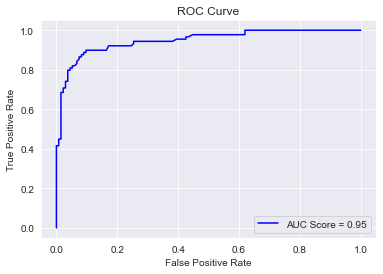

In [136]:
print("Model Validation \n")
print("Voting Classifier Accuracy: " )
print(accuracy_score(y_val, y_pred))
print("\n", "ROC Curve")
vcs_prob = vcs.predict_proba(X_val)
fpr, tpr, thresh = roc_curve(y_val, vcs_prob[:,1])
roc_auc_vc = auc(fpr, tpr)
plt.figure()
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr, tpr, 'b', label = 'AUC Score = %0.2f'%roc_auc_vc)
#plt.plot(fpr, tpr, 'r--', color = 'red')
plt.legend()

In [135]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('votingsoft_submission.csv', index=False)
print('Your submission was successfully saved!')

Your submission was successfully saved!


### Часть 7. Выводы 

Применение автоматиеского отбора признаков и объединение нескольких моделей  позволяет повысить точность алгоритма 